In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [23]:
tesla=pd.read_csv('/content/tesla.csv')

In [24]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [25]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [26]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

<ipython-input-26-484d0f65faac>:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [27]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


In [28]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


<Axes: >

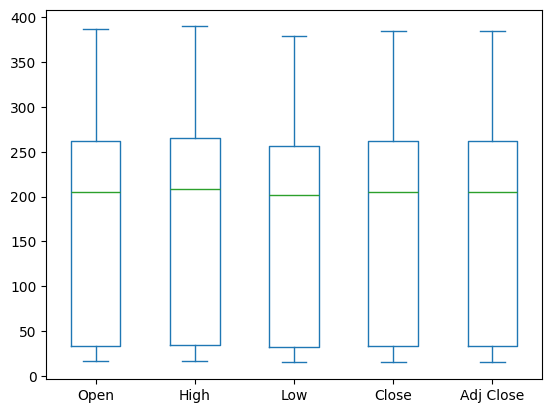

In [29]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [30]:
!pip install plotly==4.14.3

In [31]:
import plotly.graph_objects as go
import plotly.io as pio

# Set renderer to Colab (very important for Google Colab)
pio.renderers.default = 'colab'

# Make sure your 'Date' column is datetime
tesla['Date'] = pd.to_datetime(tesla['Date'])

# Define layout
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# Define the line chart
tesla_data = [go.Scatter(
    x=tesla['Date'],
    y=tesla['Close'],
    mode='lines',
    name='Tesla Close Price'
)]

# Create and show figure
fig = go.Figure(data=tesla_data, layout=layout)
fig.show()


/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:102: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [32]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [33]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [34]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [37]:
import plotly.graph_objects as go
import plotly.io as pio

# Set renderer for Colab
pio.renderers.default = 'colab'

# Ensure predictions are 1D NumPy array
y_pred = lm.predict(X_train)
if hasattr(y_pred, 'flatten'):
    y_pred = y_pred.flatten()

# Actual and predicted traces
trace0 = go.Scatter(
    x=X_train.T[0],
    y=Y_train.values,  # <-- fixed here!
    mode='markers',
    name='Actual'
)

trace1 = go.Scatter(
    x=X_train.T[0],
    y=y_pred,
    mode='lines',
    name='Predicted'
)

# Layout
layout = go.Layout(
    title='Actual vs Predicted Tesla Prices',
    xaxis=dict(
        title='Day',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# Plot the figure
plot2 = go.Figure(data=[trace0, trace1], layout=layout)
plot2.show()


In [38]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845



In [39]:
!pip install numpy==1.23.5


In [40]:
# Make predictions using your trained linear regression model (lm)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)


## FEATURE ENGINEERING

In [42]:
import plotly.graph_objs as go

# Predictions
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Actual vs Predicted (Train)
trace0 = go.Scatter(x=X_train.T[0], y=Y_train, mode='markers', name='Actual Train')
trace1 = go.Scatter(x=X_train.T[0], y=y_train_pred, mode='lines', name='Predicted Train')

# Actual vs Predicted (Test)
trace2 = go.Scatter(x=X_test.T[0], y=Y_test, mode='markers', name='Actual Test')
trace3 = go.Scatter(x=X_test.T[0], y=y_test_pred, mode='lines', name='Predicted Test')

layout = go.Layout(title='Actual vs Predicted - Train/Test',
                   xaxis=dict(title='Day'), yaxis=dict(title='Stock Price'))

fig = go.Figure(data=[trace0, trace1, trace2, trace3], layout=layout)
fig.show()


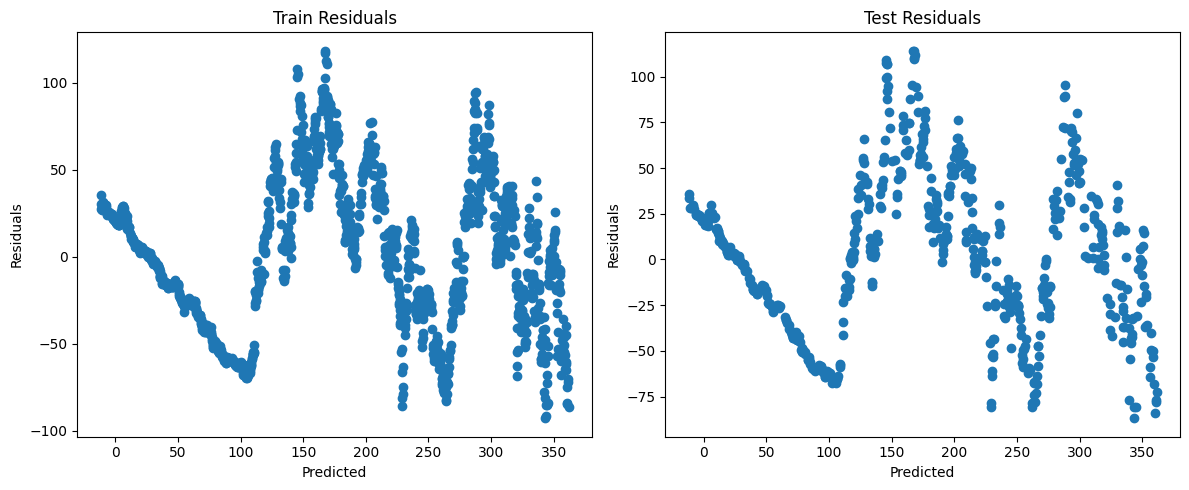

In [43]:
import matplotlib.pyplot as plt

train_residuals = Y_train - y_train_pred
test_residuals = Y_test - y_test_pred

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals)
plt.title("Train Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals)
plt.title("Test Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


In [44]:
import pandas as pd

# Assume 'Day' is a column. Add polynomial feature
tesla['Day'] = range(len(tesla))
tesla['Day_Squared'] = tesla['Day'] ** 2
tesla['MA_7'] = tesla['Close'].rolling(window=7).mean()
tesla['MA_14'] = tesla['Close'].rolling(window=14).mean()
tesla = tesla.dropna()  # drop rows with NaN from rolling


In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(tesla[['Day']])

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, tesla['Close'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Train R²:", model.score(X_train, y_train))
print("Test R²:", model.score(X_test, y_test))

Train R²: 0.8677274661909659
Test R²: 0.8788043237870548


# RANDOM FOREST

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# You already have X = ['Day', 'Day_Squared', 'MA_7', 'MA_14']
X = tesla[['Day', 'Day_Squared', 'MA_7', 'MA_14']]
y = tesla['Close']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Metrics
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))


Train R²: 0.9994474154004922
Test R²: 0.9966675773095338
Test MSE: 45.4823479453652


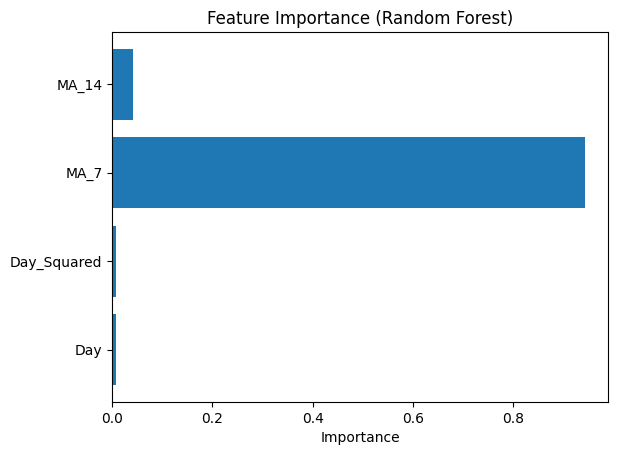

In [47]:
import matplotlib.pyplot as plt

feat_importances = rf.feature_importances_
plt.barh(X.columns, feat_importances)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

# Re-split properly
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain and predict
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)


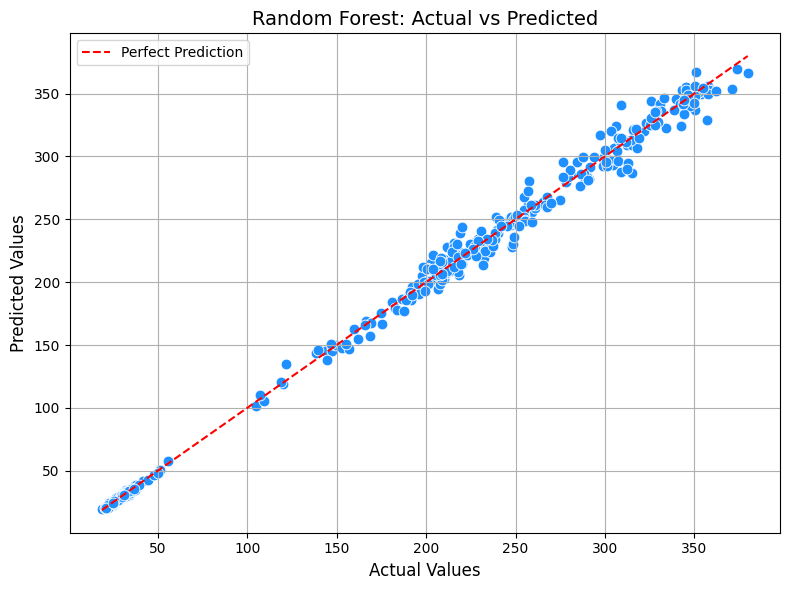

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_true = np.ravel(Y_test)
y_pred = np.ravel(y_pred)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true, y=y_pred, color='dodgerblue', edgecolor='white', s=60)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Random Forest: Actual vs Predicted', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


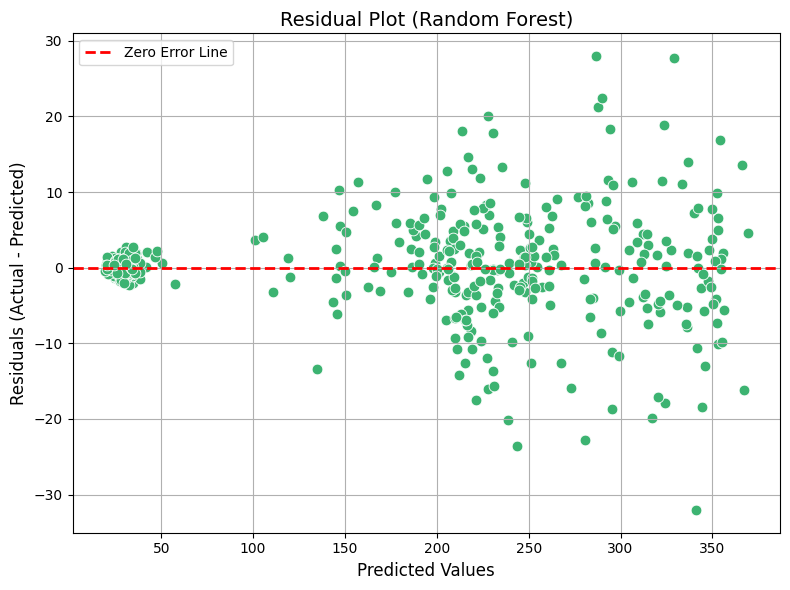

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals
residuals = Y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='mediumseagreen', edgecolor='white', s=60)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot (Random Forest)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# XGBOOST

In [51]:
!pip install xgboost

In [52]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error


In [53]:
# Initialize and train XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, Y_train)

# Predictions
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)


In [54]:
# R2 Score
train_r2 = r2_score(Y_train, y_train_pred_xgb)
test_r2 = r2_score(Y_test, y_test_pred_xgb)

# Mean Squared Error
test_mse = mean_squared_error(Y_test, y_test_pred_xgb)

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"Test MSE: {test_mse}")


Train R²: 0.9996362585762724
Test R²: 0.9972961410556901
Test MSE: 36.90343774579485


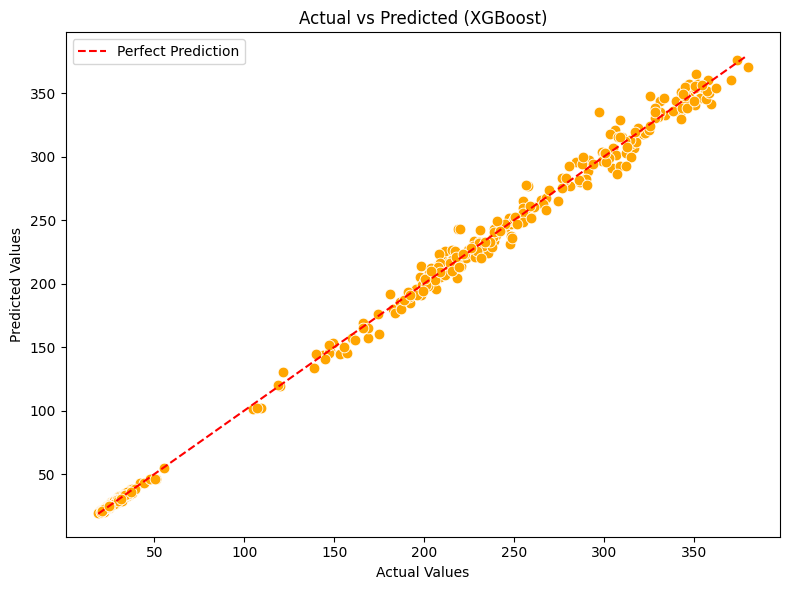

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=y_test_pred_xgb, color='orange', edgecolor='white', s=60)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (XGBoost)')
plt.legend()
plt.tight_layout()
plt.show()

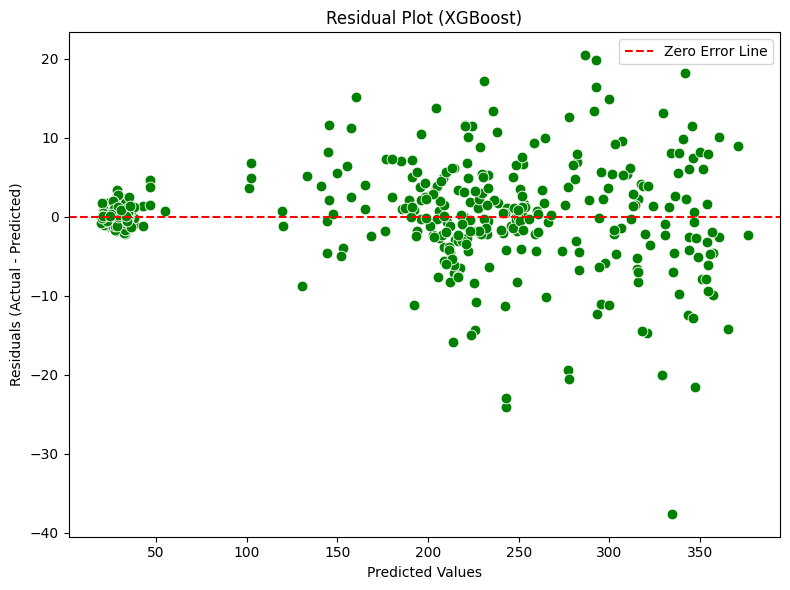

In [56]:
residuals = Y_test - y_test_pred_xgb

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred_xgb, y=residuals, color='green', edgecolor='white', s=60)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (XGBoost)')
plt.legend()
plt.tight_layout()
plt.show()


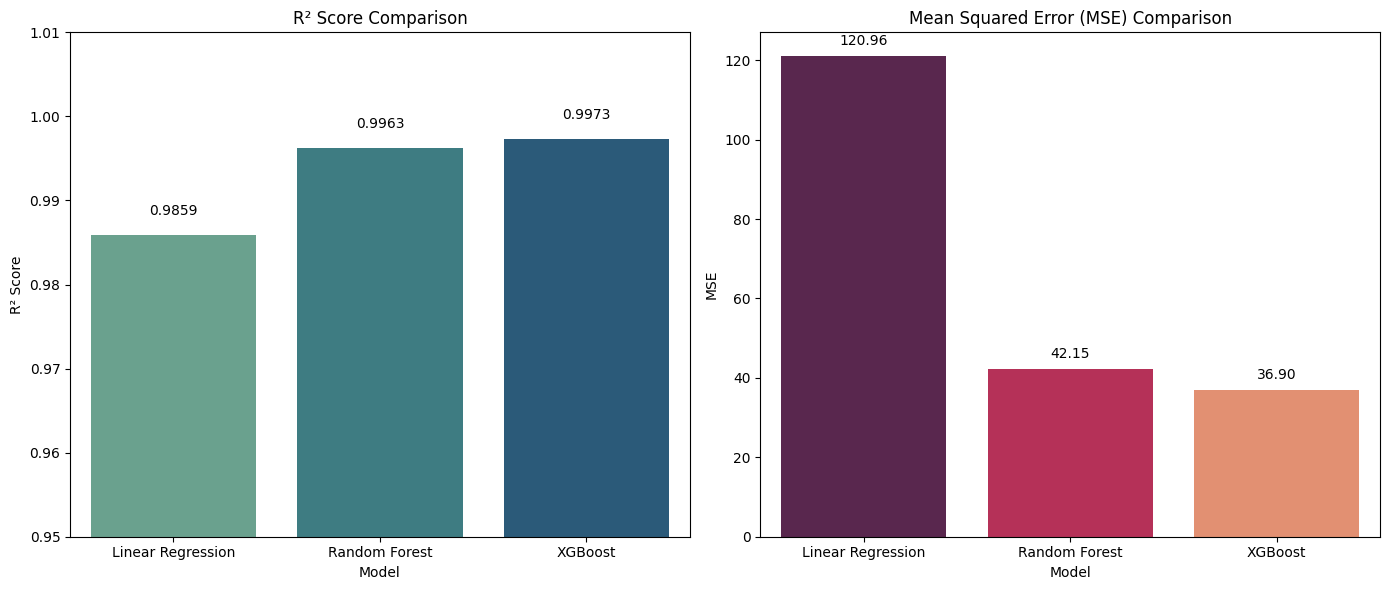

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model names
models = ['Linear Regression', 'Random Forest', 'XGBoost']
r2_scores = [0.9859, 0.9963, 0.9973]
mse_scores = [120.96, 42.15, 36.90]

# Create DataFrames
r2_df = pd.DataFrame({'Model': models, 'R2': r2_scores})
mse_df = pd.DataFrame({'Model': models, 'MSE': mse_scores})

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# R² Plot
sns.barplot(data=r2_df, x='Model', y='R2', hue='Model', dodge=False, palette='crest', ax=axes[0], legend=False)
axes[0].set_title('R² Score Comparison')
axes[0].set_ylim(0.95, 1.01)
axes[0].set_ylabel('R² Score')
for i, val in enumerate(r2_scores):
    axes[0].text(i, val + 0.002, f'{val:.4f}', ha='center', va='bottom')

# MSE Plot
sns.barplot(data=mse_df, x='Model', y='MSE', hue='Model', dodge=False, palette='rocket', ax=axes[1], legend=False)
axes[1].set_title('Mean Squared Error (MSE) Comparison')
axes[1].set_ylabel('MSE')
for i, val in enumerate(mse_scores):
    axes[1].text(i, val + 2, f'{val:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
